In [10]:
%pip install -q gradio
%pip install -q catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
sns.set_theme()

In [13]:
df = sns.load_dataset("titanic")

In [14]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [15]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='pclass', ylabel='count'>

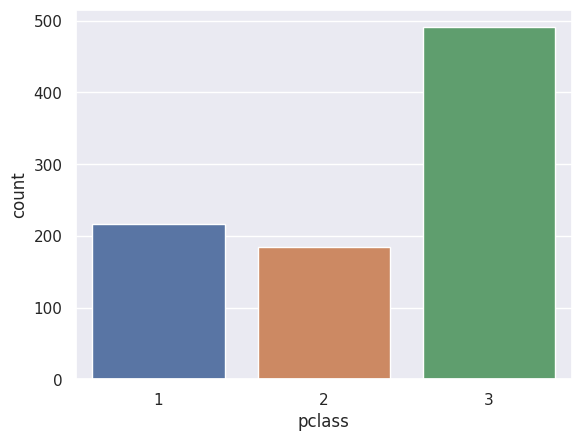

In [16]:
sns.countplot(x = "pclass", data = df)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='who', ylabel='count'>

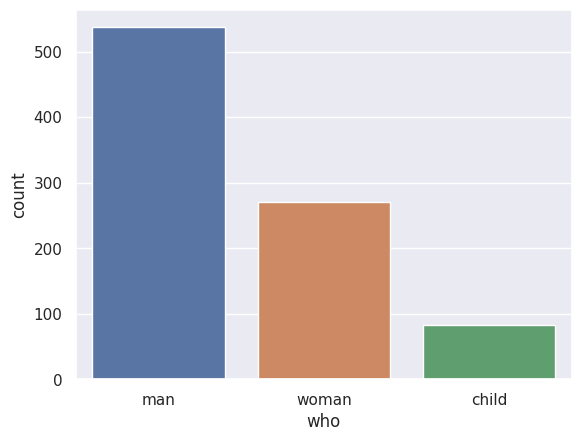

In [17]:
sns.countplot(x = "who", data = df)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='embarked', ylabel='count'>

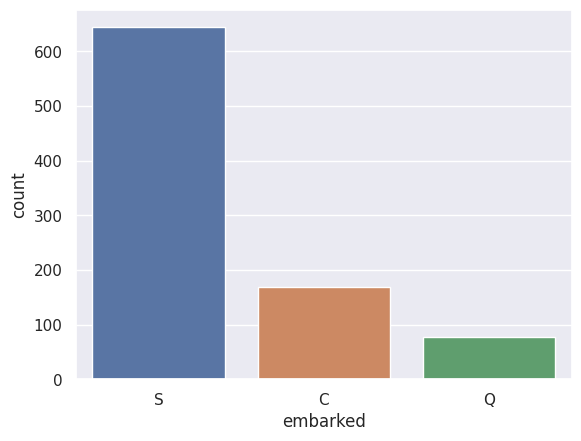

In [18]:
sns.countplot(x = "embarked", data = df)

In [19]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
# Identifying features, we are keeping very few features as we want to simulate this using gradio
features = [ 'pclass', 'sex', 'age', 'fare',
       'embarked']
target = 'survived'

In [21]:
df[features].isna().sum()/df.shape[0]

pclass      0.000000
sex         0.000000
age         0.198653
fare        0.000000
embarked    0.002245
dtype: float64

In [22]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
# Filling missing values
df['age'].fillna(np.nanquantile(df['age'], 0.5), inplace = True)
df['embarked'].fillna("S", inplace = True)

In [24]:
from catboost import CatBoostClassifier

In [25]:
clf = CatBoostClassifier()

In [26]:
# Creating features and target
X = df[features]
y = df[target]

In [27]:
clf.fit(X,y, cat_features=['pclass', 'sex', 'embarked'])

Learning rate set to 0.009807
0:	learn: 0.6861079	total: 51.3ms	remaining: 51.3s
1:	learn: 0.6807116	total: 52.8ms	remaining: 26.3s
2:	learn: 0.6752663	total: 54.9ms	remaining: 18.3s
3:	learn: 0.6712222	total: 56ms	remaining: 14s
4:	learn: 0.6661659	total: 57.4ms	remaining: 11.4s
5:	learn: 0.6609001	total: 58.9ms	remaining: 9.76s
6:	learn: 0.6547619	total: 61.6ms	remaining: 8.73s
7:	learn: 0.6488790	total: 63.9ms	remaining: 7.92s
8:	learn: 0.6436617	total: 66.2ms	remaining: 7.29s
9:	learn: 0.6391954	total: 67.9ms	remaining: 6.72s
10:	learn: 0.6348349	total: 69.2ms	remaining: 6.22s
11:	learn: 0.6295209	total: 70.9ms	remaining: 5.84s
12:	learn: 0.6252814	total: 72.5ms	remaining: 5.5s
13:	learn: 0.6206696	total: 74.4ms	remaining: 5.24s
14:	learn: 0.6153431	total: 76.2ms	remaining: 5s
15:	learn: 0.6111353	total: 77.7ms	remaining: 4.78s
16:	learn: 0.6063322	total: 81.7ms	remaining: 4.72s
17:	learn: 0.6013640	total: 83.7ms	remaining: 4.56s
18:	learn: 0.5979046	total: 85.2ms	remaining: 4.4s
1

In [28]:
clf.save_model("model.bin")